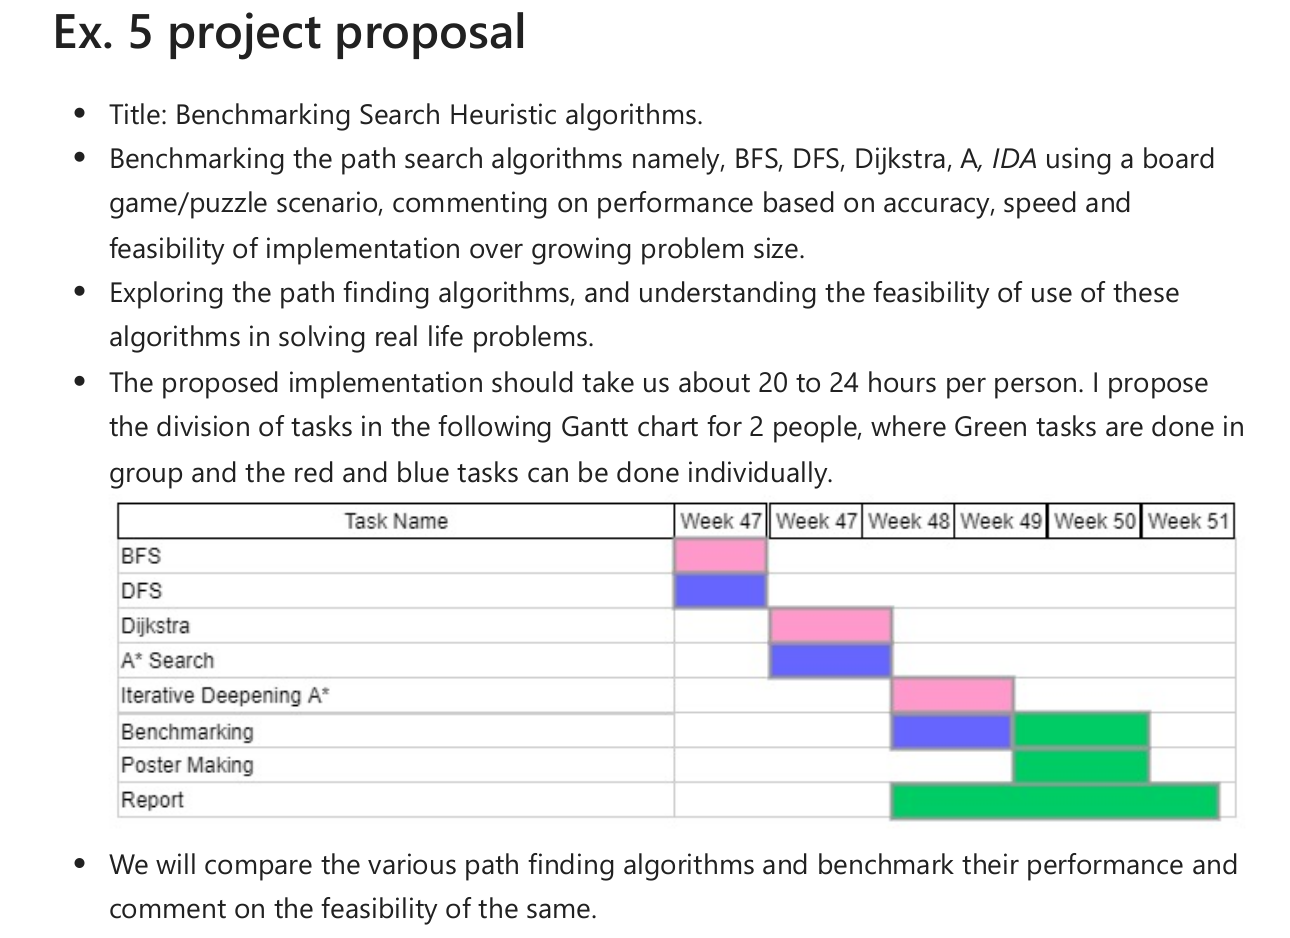

#### Selected Problem for solving: Sliding Puzzle with varying Size

On an 2 x 3 board, there are five tiles labeled from 1 to 5, and an empty square represented by 0. A move consists of choosing 0 and a 4-directionally adjacent number and swapping it.

The state of the board is solved if and only if the board is [[1,2,3],[4,5,0]].

Given the puzzle board board, return the least number of moves required so that the state of the board is solved. If it is impossible for the state of the board to be solved, return -1.

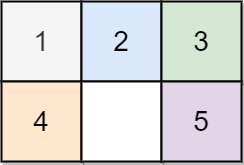

https://leetcode.com/problems/sliding-puzzle/


0. Understand the problem
1. Let's implement 4 different methods: BFS, DFS, Dijkstra, A*
2. Let's generate input data
3. Let's benchmark them
4. Let's plot them, compare, write down the fastest one
5. Let's write down the final report



### BFS

In [16]:
from itertools import permutations
import time, random, collections
import numpy as np

In [2]:
!pip3 install numpy

You are using pip version 18.0, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
def slidingPuzzleBFS(board):
    """
    :type board: List[List[int]]
    :rtype: int
    """
    # BFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_state(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_state = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_state.append(new_state)
        return next_state            
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)        
    queue = collections.deque([(initial, 0)])
    visited = set([initial])
    while queue:
        state, dist = queue.pop()
        if state == final: return dist, len(visited)
        for nstate in get_next_state(state):
            queue.appendleft((nstate, dist+1))
    return -1, len(visited)

In [18]:
slidingPuzzleBFS([[1,0,3],[4,2,5],[7,8,6]])

(3, 21)

### DFS

In [21]:
def slidingPuzzleDFS(board):
    """
    :type board: List[List[int]]
    :rtype: int
    """
    # DFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_state(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_state = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_state.append(new_state)
        return next_state            
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)        
    stack = collections.deque([(initial, 0)])
    visited = set([initial])
    while stack:
        state, dist = stack.pop()
        if state == final: return dist, len(visited)
        for nstate in get_next_state(state):
            stack.append((nstate, dist+1))
    return -1, len(visited)

In [22]:
slidingPuzzleDFS([[1,0,3],[4,2,5],[7,8,6]])

(63343, 152115)

### A*

In [25]:
import heapq

def slidingPuzzleAStar(board):
    def heuristic_disance(state, final):
        state, final, count = list(state), list(final), 0
        for index, tile in enumerate(state):
            count += abs(tile - final[index])
        return count

    # BFS and each node is the state of the board, convert the board to 1d and use tuple
    # so that it is hashable
    n, m = len(board), len(board[0])
    def get_next_states(state):
        state = list(state)
        index = state.index(0)
        i, j = divmod(index, m)
        next_states = []
        for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
            if 0 <= x < n and 0 <= y < m:
                new_state = state.copy()
                new_state[index], new_state[x*m+y] = new_state[x*m+y], new_state[index]
                new_state = tuple(new_state)
                if new_state not in visited:
                    visited.add(new_state)
                    next_states.append(new_state)
        return next_states
                
    initial = []
    final = np.arange(1, (n * m))
    final = tuple(np.append(final, 0))
    for i in range(n):
        for j in range(m):
            initial.append(board[i][j])
    initial = tuple(initial)
    openList = list()
    heapq.heappush(openList, (0, initial, 0))
    visited = set([initial])
    while openList:
        f, state, current_g = heapq.heappop(openList)
        if state == final: 
            return current_g, len(visited)
        for next_state in get_next_states(state):
            g = current_g + 1
            h = heuristic_disance(next_state, final)
            f = g + h
            heapq.heappush(openList, (f, next_state, g))
    return -1, len(visited)

In [26]:
slidingPuzzleAStar([[1,0,3],[4,2,5],[7,8,6]])

(3, 12)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
plt.rcParams.update({'font.size': 20})

https://www.openbookproject.net/py4fun/tiles/tiles.html

### Benchmarking
- Soft Scaling
- Hard Scaling

In [ ]:
# A Python program to print all
# permutations using library function

start = time.time()
 
# Get all permutations of [1, 2, 3]
perms = permutations([x for x in range(6)])
 
# Print the obtained permutations
problems = []
for p in list(perms):
    problems.append(np.reshape(p, (2, 3)).tolist())

random.shuffle(problems)
print("Problems: ", len(problems))

solvable, unsolvable = [], []
start = time.time()
print("Fetching first 50 Solvable problems:")
for p in range(999):
    #print(p)
    if slidingPuzzleBFS(problems[p])[0] != -1:
        solvable.append(problems[p])
    else:
        unsolvable.append(problems[p])
    if len(solvable) == 50:
        break

print(f"Wall time taken: {time.time() - start}s")
np.save("problem_sets_2x3.npy", solvable)
np.save("unsolvable_problem_sets_2x3.npy", unsolvable)

Problems:  720
Fetching first 50 Solvable problems:
Wall time taken: 0.14194202423095703s


In [ ]:
solvable = np.load("problem_sets_2x3.npy")
print(f"Solving {solvable.shape[0]} problems: of shape {solvable.shape[1:]}")
problems, moves, visits, times = solvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 50 problems: of shape (2, 3)
With BFS:
Total time taken:  0.04514288902282715
Using DFS:
Total time taken:  0.035337209701538086
With A*
Total time taken:  0.04767584800720215


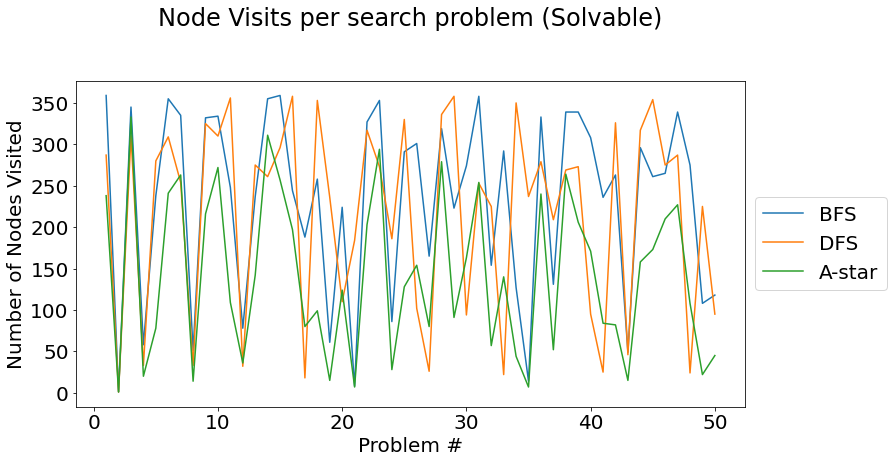

In [ ]:
# Nodes Visited
plt.figure(figsize=(12, 6))
plt.title("Node Visits per search problem (Solvable)", y=1.15)
problems = [i+1 for i in range(50)]
plt.plot(problems, visits[0], label="BFS")
plt.plot(problems, visits[1], label="DFS")
plt.plot(problems, visits[2], label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Number of Nodes Visited")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average Nodes visited with BFS: ", np.mean(visits[0]))
print("Average Nodes visited with DFS: ", np.mean(visits[1]))
print("Average Nodes visited with A-star: ", np.mean(visits[2]))

Average Nodes visited with BFS:  232.24
Average Nodes visited with DFS:  216.58
Average Nodes visited with A-star:  140.64


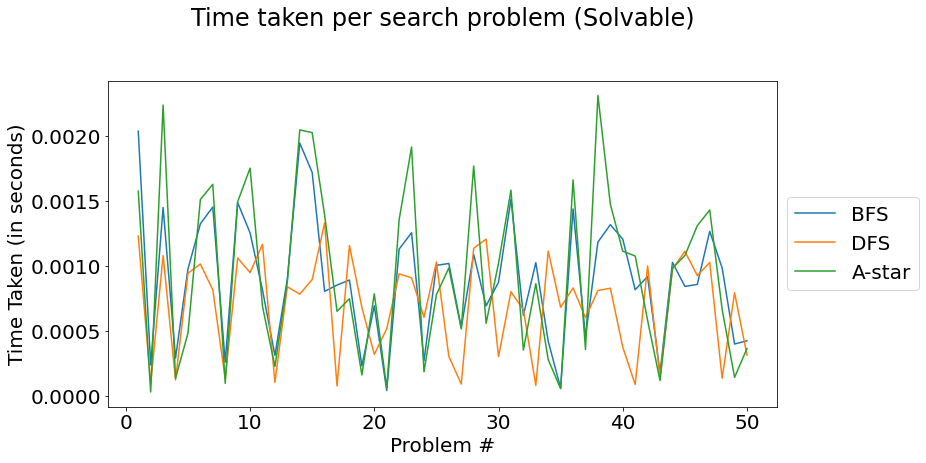

In [ ]:
# Time Taken
plt.figure(figsize=(12, 6))
plt.title("Time taken per search problem (Solvable)", y=1.15)
problems = [i+1 for i in range(50)]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken (in seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average Time taken with BFS: ", np.round(np.mean(times[0]), 6), " in Seconds")
print("Average Time taken with DFS: ", np.round(np.mean(times[1]), 6), " in Seconds")
print("Average Time taken with A-star: ", np.round(np.mean(times[2]), 6), " in Seconds")

Average Time taken with BFS:  0.000895  in Seconds
Average Time taken with DFS:  0.000702  in Seconds
Average Time taken with A-star:  0.000949  in Seconds


In [ ]:
avg_visits = [[np.mean(visits[0])], [np.mean(visits[1])], [np.mean(visits[2])]]
avg_visits

[[232.24], [216.58], [140.64]]

In [ ]:
avg_times = [[np.mean(times[0])], [np.mean(times[1])], [np.mean(times[2])]]
avg_times

[[0.0008950901031494141], [0.0007018423080444335], [0.0009492206573486329]]

### Unsolvable 2x3 Problems

In [ ]:
unsolvable = np.load("unsolvable_problem_sets_2x3.npy")
print(f"Solving {unsolvable.shape[0]} problems (Unsolvable): of shape {unsolvable.shape[1:]}")
problems, moves, visits, times = unsolvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 58 problems (Unsolvable): of shape (2, 3)
With BFS:
Total time taken:  0.09554719924926758
Using DFS:
Total time taken:  0.0868082046508789
With A*
Total time taken:  0.15349078178405762


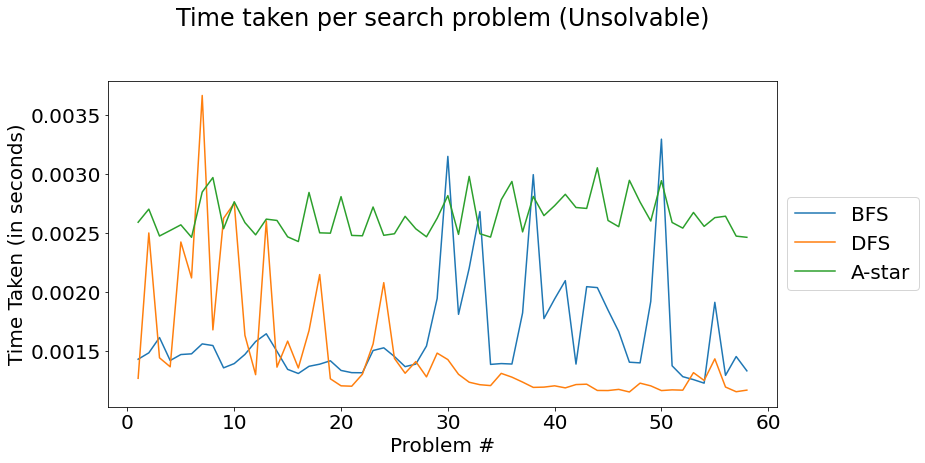

In [ ]:
# Time Taken
plt.figure(figsize=(12, 6))
plt.title("Time taken per search problem (Unsolvable)", y=1.15)
problems = [i+1 for i in range(unsolvable.shape[0])]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken (in seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average Time taken with BFS: ", np.round(np.mean(times[0]), 6), " in Seconds")
print("Average Time taken with DFS: ", np.round(np.mean(times[1]), 6), " in Seconds")
print("Average Time taken with A-star: ", np.round(np.mean(times[2]), 6), " in Seconds")

Average Time taken with BFS:  0.001642  in Seconds
Average Time taken with DFS:  0.001492  in Seconds
Average Time taken with A-star:  0.002642  in Seconds


In [ ]:
unsolvable_avg = [[np.mean(times[0])], [np.mean(times[1])], [np.mean(times[2])]]
unsolvable_avg

[[0.0016422929434940733], [0.001492455087859055], [0.002642339673535577]]

## 3x3 Sliding Puzzle

In [40]:
# A Python program to print all
# permutations using library function

from itertools import permutations
import time, random

start = time.time()
 
# Get all permutations of [1, 2, 3]
perms = permutations([x for x in range(9)])
 
# Print the obtained permutations
problems = []
for p in list(perms):
    problems.append(np.reshape(p, (3, 3)).tolist())

random.shuffle(problems)
print("Problems: ", len(problems))

solvable, unsolvable = [], []
start = time.time()
print("Fetching first 50 Solvable problems:")
for problem in problems:
    #print(p)
    if slidingPuzzleBFS(problem)[0] != -1:
        solvable.append(problem)
    else:
        unsolvable.append(problem)
    if len(solvable) == 50:
        break

print(f"Wall time taken: {time.time() - start}s")
np.save("problem_sets_3x3.npy", solvable)
np.save("unsolvable_problem_sets_3x3.npy", unsolvable)

Problems:  362880
Fetching first 50 Solvable problems:


KeyboardInterrupt: 

In [ ]:
solvable = np.load("problem_sets_3x3.npy")
print(f"Solving {solvable.shape[0]} problems: of shape {solvable.shape[1:]}")
problems, moves, visits, times = solvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 50 problems: of shape (3, 3)
With BFS:
Total time taken:  13.124978065490723
Using DFS:
Total time taken:  16.008687496185303
With A*
Total time taken:  2.2718892097473145


In [ ]:
avg_visits[0].append(np.mean(visits[0]))
avg_visits[1].append(np.mean(visits[1]))
avg_visits[2].append(np.mean(visits[2]))
avg_visits

[[218.26, 111060.32], [187.26, 144198.02], [119.1, 8228.88]]

In [ ]:
avg_times[0].append(np.mean(times[0]))
avg_times[1].append(np.mean(times[1]))
avg_times[2].append(np.mean(times[2]))
avg_times

[[0.00047188758850097656, 0.26249361991882325],
 [0.0003874969482421875, 0.32016770362854],
 [0.0005568313598632812, 0.045432839393615726]]

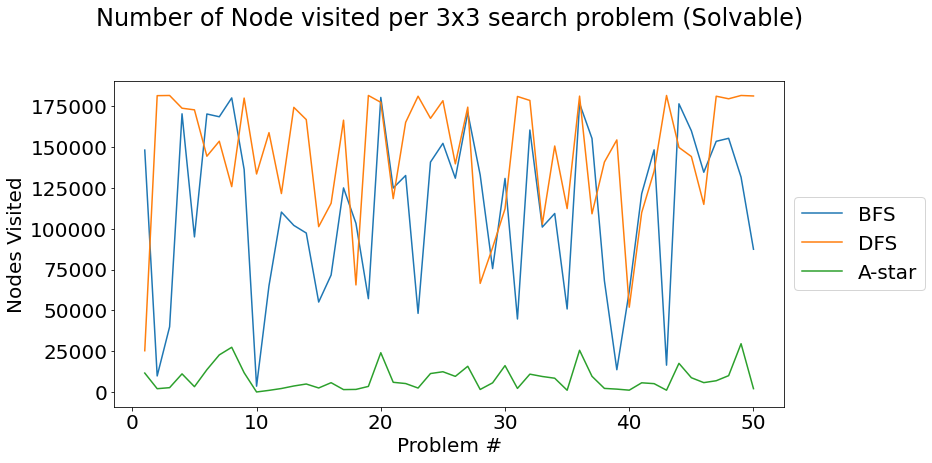

In [ ]:
# Nodes Visited

plt.figure(figsize=(12, 6))
plt.title("Number of Node visited per 3x3 search problem (Solvable)", y=1.15)
problems = [i+1 for i in range(50)]
plt.plot(problems, visits[0], label="BFS")
plt.plot(problems, visits[1], label="DFS")
plt.plot(problems, visits[2], label="A-star")

plt.xlabel("Problem #")
plt.ylabel("Nodes Visited")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average number of nodes visited with BFS: ", np.mean(times[0]) * 50)
print("Average number of nodes visited with DFS: ", np.mean(times[1]) * 50)
print("Average number of nodes visited with A-star: ", np.mean(times[2]) * 50)

Average number of nodes visited with BFS:  13.124680995941162
Average number of nodes visited with DFS:  16.008385181427002
Average number of nodes visited with A-star:  2.271641969680786


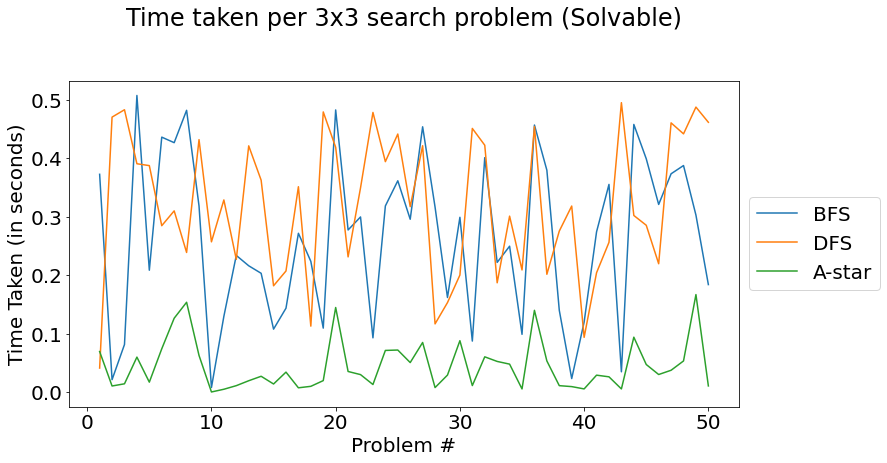

In [ ]:
# Time Taken

plt.figure(figsize=(12, 6))
plt.title("Time taken per 3x3 search problem (Solvable)", y=1.15)

problems = [i+1 for i in range(50)]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken (in seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average Time taken with BFS: ", np.round(np.mean(times[0]), 6), " in Seconds")
print("Average Time taken with DFS: ", np.round(np.mean(times[1]), 6), " in Seconds")
print("Average Time taken with A-star: ", np.round(np.mean(times[2]), 6), " in Seconds")


Average Time taken with BFS:  0.262494  in Seconds
Average Time taken with DFS:  0.320168  in Seconds
Average Time taken with A-star:  0.045433  in Seconds


### Unsolvable set 3x3

In [ ]:
unsolvable = np.load("unsolvable_problem_sets_3x3.npy")
print(f"Solving {unsolvable.shape[0]} problems (Unsolvable): of shape {unsolvable.shape[1:]}")
problems, moves, visits, times = unsolvable.tolist(), [[], [], []], [[], [], []], [[], [], []]

print("With BFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleBFS(p)
    moves[0].append(total_moves)
    visits[0].append(visited_nodes)
    times[0].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

print("Using DFS:")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleDFS(p)
    moves[1].append(total_moves)
    visits[1].append(visited_nodes)
    times[1].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)
    
print("With A*")
total_start = time.time()
for p in problems:
    start = time.time()
    total_moves, visited_nodes = slidingPuzzleAStar(p)
    moves[2].append(total_moves)
    visits[2].append(visited_nodes)
    times[2].append(time.time() - start)
print("Total time taken: ", time.time() - total_start)

Solving 58 problems (Unsolvable): of shape (3, 3)
With BFS:
Total time taken:  30.67444109916687
Using DFS:
Total time taken:  31.121973276138306
With A*
Total time taken:  80.53897976875305


In [ ]:
unsolvable_avg[0].append(np.mean(times[0]))
unsolvable_avg[1].append(np.mean(times[1]))
unsolvable_avg[2].append(np.mean(times[2]))
unsolvable_avg

[[0.0014078500794201363, 0.528863812315053],
 [0.0007749243480403249, 0.5365797363478562],
 [0.0016945222528969369, 1.3885968964675377]]

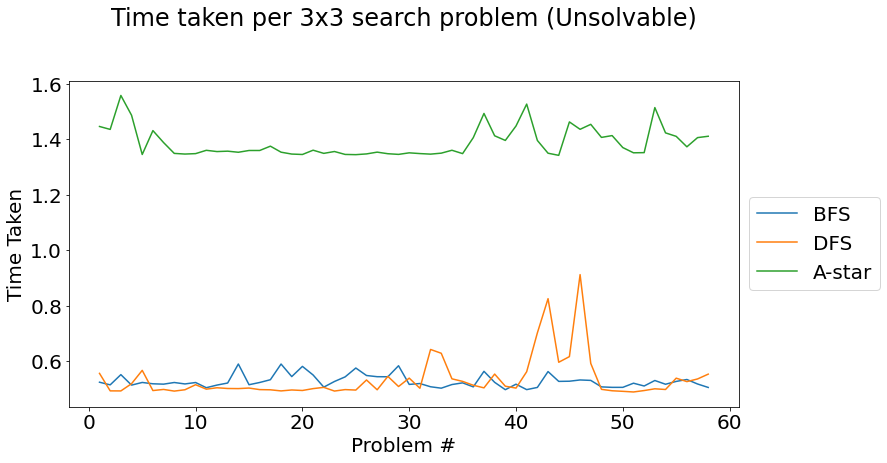

In [ ]:
# Time Taken

plt.figure(figsize=(12, 6))
plt.title("Time taken per 3x3 search problem (Unsolvable)", y=1.15)
problems = [i+1 for i in range(unsolvable.shape[0])]
plt.plot(problems, times[0], label="BFS")
plt.plot(problems, times[1], label="DFS")
plt.plot(problems, times[2], label="A-star")
plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("Average Time taken with BFS: ", np.round(np.mean(times[0]), 6), " in Seconds")
print("Average Time taken with DFS: ", np.round(np.mean(times[1]), 6), " in Seconds")
print("Average Time taken with A-star: ", np.round(np.mean(times[2]), 6), " in Seconds")

Average Time taken with BFS:  0.528864  in Seconds
Average Time taken with DFS:  0.53658  in Seconds
Average Time taken with A-star:  1.388597  in Seconds


In [ ]:
problems = [np.append(np.arange(1, 10), np.random.permutation([10, 11, 12, 13, 14, 0, 15])).reshape(4, 4).tolist() for x in range(100)]

### Average growths in performance as Size of problem grows..

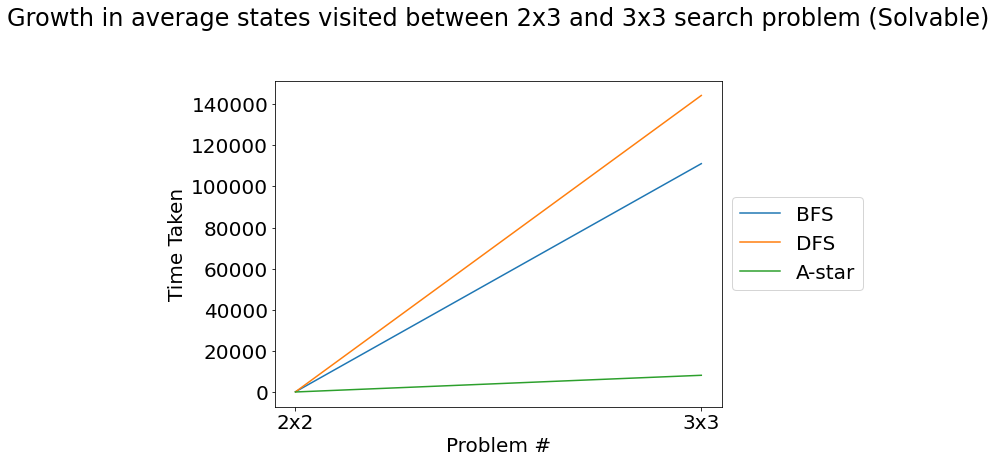

In [ ]:
# Avg states Visited

plt.figure(figsize=(8, 6))
plt.title("Growth in average states visited between 2x3 and 3x3 search problem (Solvable)", y=1.15)

problems = [i+1 for i in range(len(avg_visits[0]))]
plt.plot(problems, avg_visits[0], label="BFS")
plt.plot(problems, avg_visits[1], label="DFS")
plt.plot(problems, avg_visits[2], label="A-star")
plt.xticks(ticks=[1, 2], labels=["2x2", "3x3"])

plt.xlabel("Problem #")
plt.ylabel("Time Taken")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

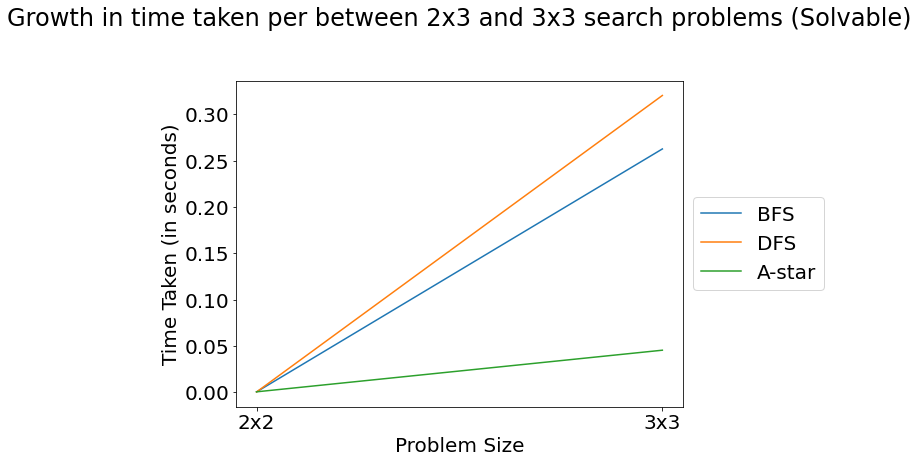

In [ ]:
# Avg Time Taken

plt.figure(figsize=(8, 6))
plt.title("Growth in time taken per between 2x3 and 3x3 search problems (Solvable)", y=1.15)

problems = [i+1 for i in range(len(avg_times[0]))]
plt.plot(problems, avg_times[0], label="BFS")
plt.plot(problems, avg_times[1], label="DFS")
plt.plot(problems, avg_times[2], label="A-star")
plt.xticks(ticks=[1, 2], labels=["2x2", "3x3"])
plt.xlabel("Problem Size")
plt.ylabel("Time Taken (in seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

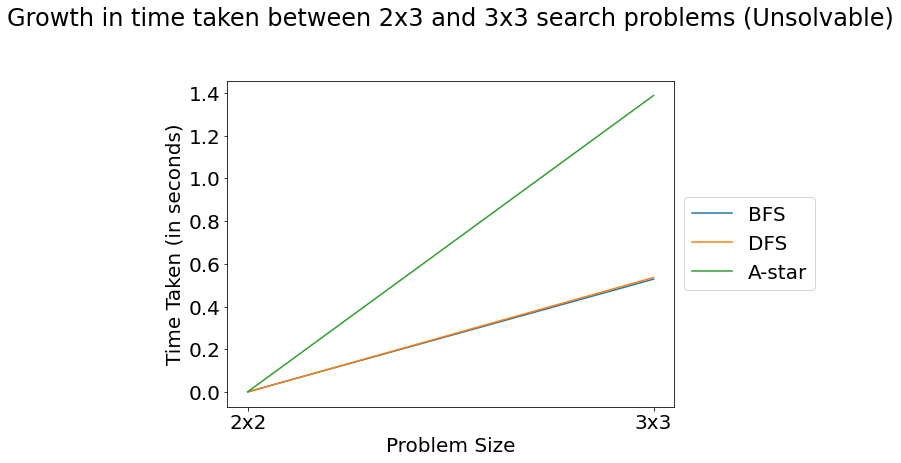

In [ ]:
# Avg Time Taken

plt.figure(figsize=(8, 6))
plt.title("Growth in time taken between 2x3 and 3x3 search problems (Unsolvable)", y=1.15)

problems = [i+1 for i in range(len(unsolvable_avg[0]))]
plt.plot(problems, unsolvable_avg[0], label="BFS")
plt.plot(problems, unsolvable_avg[1], label="DFS")
plt.plot(problems, unsolvable_avg[2], label="A-star")
plt.xticks(ticks=[1, 2], labels=["2x2", "3x3"])
plt.xlabel("Problem Size")
plt.ylabel("Time Taken (in seconds)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
print("BFS Avg Time:", np.round(avg_times[0], 8))
print("DFS Avg Time:", np.round(avg_times[1], 8))
print("A* Avg Time:", np.round(avg_times[2], 8))

BFS Avg Time: [0.00047189 0.26249362]
DFS Avg Time: [0.0003875 0.3201677]
A* Avg Time: [0.00055683 0.04543284]


In [ ]:
print("BFS State Visits:", avg_visits[0])
print("DFS State Visits:", avg_visits[1])
print("A* State Visits:", avg_visits[2])

BFS State Visits: [218.26, 111060.32]
DFS State Visits: [187.26, 144198.02]
A* State Visits: [119.1, 8228.88]


In [ ]:
print("BFS Avg Time (Unsolvable problems):", np.round(unsolvable_avg[0], 8))
print("DFS Avg Time (Unsolvable problems):", np.round(unsolvable_avg[1], 8))
print("A* Avg Time (Unsolvable problems):", np.round(unsolvable_avg[2], 8))

BFS Avg Time (Unsolvable problems): [0.00140785 0.52886381]
DFS Avg Time (Unsolvable problems): [0.00077492 0.53657974]
A* Avg Time (Unsolvable problems): [0.00169452 1.3885969 ]


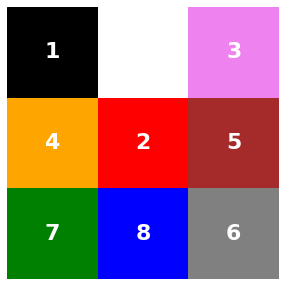

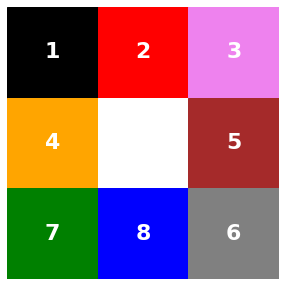

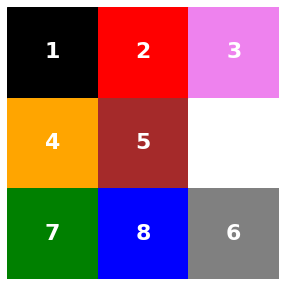

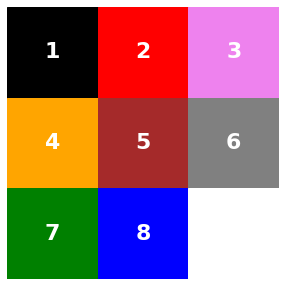

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from matplotlib.pyplot import figure

colors = {
    1 : 'black',
    2 : 'red',
    3 : 'violet',
    4 : 'orange',
    5 : 'brown',
    6 : 'grey',
    7 : 'green',
    8 : 'blue',
    0 : 'white'
}

def drawPlot(rectangles):
    fig, ax = plt.subplots()
    fig.set_size_inches(5,5)
    for r in rectangles:
        ax.add_artist(rectangles[r])
        rx, ry = rectangles[r].get_xy()
        cx = rx + rectangles[r].get_width()/2.0
        cy = ry + rectangles[r].get_height()/2.0
        ax.annotate(r, (cx, cy), color='w', weight='bold', 
                    fontsize=22, ha='center', va='center')
    ax.set_xlim((0, 9))
    ax.set_ylim((0, 9))
    ax.set_aspect('equal')
    ax.axis("off")
    plt.rcParams.update({'font.size': 20})
    plt.show()

rectangles = {
    1 : mpatch.Rectangle((0,6), 3,3, color=colors[1]),
    0 : mpatch.Rectangle((3,6), 3,3, color=colors[0]),
    3 : mpatch.Rectangle((6,6), 3,3, color=colors[3]),
    4 : mpatch.Rectangle((0,3), 3,3, color=colors[4]),
    2 : mpatch.Rectangle((3,3), 3,3, color=colors[2]),
    5 : mpatch.Rectangle((6,3), 3,3, color=colors[5]),
    7 : mpatch.Rectangle((0,0), 3,3, color=colors[7]),
    8 : mpatch.Rectangle((3,0), 3,3, color=colors[8]),
    6 : mpatch.Rectangle((6,0), 3,3, color=colors[6])
}
drawPlot(rectangles)

rectangles = {
    1 : mpatch.Rectangle((0,6), 3,3, color=colors[1]),
    2 : mpatch.Rectangle((3,6), 3,3, color=colors[2]),
    3 : mpatch.Rectangle((6,6), 3,3, color=colors[3]),
    4 : mpatch.Rectangle((0,3), 3,3, color=colors[4]),
    0 : mpatch.Rectangle((3,3), 3,3, color=colors[0]),
    5 : mpatch.Rectangle((6,3), 3,3, color=colors[5]),
    7 : mpatch.Rectangle((0,0), 3,3, color=colors[7]),
    8 : mpatch.Rectangle((3,0), 3,3, color=colors[8]),
    6 : mpatch.Rectangle((6,0), 3,3, color=colors[6])
}
drawPlot(rectangles)

rectangles = {
    1 : mpatch.Rectangle((0,6), 3,3, color=colors[1]),
    2 : mpatch.Rectangle((3,6), 3,3, color=colors[2]),
    3 : mpatch.Rectangle((6,6), 3,3, color=colors[3]),
    4 : mpatch.Rectangle((0,3), 3,3, color=colors[4]),
    5 : mpatch.Rectangle((3,3), 3,3, color=colors[5]),
    0 : mpatch.Rectangle((6,3), 3,3, color=colors[0]),
    7 : mpatch.Rectangle((0,0), 3,3, color=colors[7]),
    8 : mpatch.Rectangle((3,0), 3,3, color=colors[8]),
    6 : mpatch.Rectangle((6,0), 3,3, color=colors[6])
}
drawPlot(rectangles)

rectangles = {
    1 : mpatch.Rectangle((0,6), 3,3, color=colors[1]),
    2 : mpatch.Rectangle((3,6), 3,3, color=colors[2]),
    3 : mpatch.Rectangle((6,6), 3,3, color=colors[3]),
    4 : mpatch.Rectangle((0,3), 3,3, color=colors[4]),
    5 : mpatch.Rectangle((3,3), 3,3, color=colors[5]),
    6 : mpatch.Rectangle((6,3), 3,3, color=colors[6]),
    7 : mpatch.Rectangle((0,0), 3,3, color=colors[7]),
    8 : mpatch.Rectangle((3,0), 3,3, color=colors[8]),
    0 : mpatch.Rectangle((6,0), 3,3, color=colors[0])
}
drawPlot(rectangles)

In [41]:
slidingPuzzleAStar([[1,0,3],[4,2,5],[7,8,6]])

(3, 12)